# TP 2 : Méthode de gradient conjugué
Le but de cette deuxième partie du TP est de programmer, valider et expérimenter l’algorithme du gradient conjugué GC (et sa variante Fletcher-Reeves).


## Etape 1.
> Rappeler l’algorithme GC et l’implémenter. On pourra utilement se servir comme point de départ des codes de gradient développés en Partie 1. Effectuer les tests de validation rapide pour les fonctions quadratiques suivantes ($N = 10, 20, 40$) :
$$
J_{1}(v)=\sum_{i=1}^{i=N}\left(v_{i}-1\right)^{2}, \quad J_{2}(v)=\sum_{i=1}^{i=N}\left(v_{i}-i\right)^{2}
$$


On rappelle que pour une fonction $J$ quadratique :
$$
J(v)=\frac{1}{2} \langle A v, v \rangle -\langle b, v\rangle; \quad\quad\quad \nabla J(v)=A v-b
$$
où $A$ est une matrice symétrique définie positive, l'algorithme GC s'écrit comme suit:

**Pseudocode**

>  
- Initialisation: $u_0 \in {\mathbb R}^n$ arbitraire, $d_0 = \nabla J(u_0) \in {\mathbb R}^n$
- Itérations: répéter pour $k=0,1,\dots$
  - calculer le gradient $G_k = \nabla J (u_{k})$;
  - calculer $\rho_k$
  $$
  \rho_k = \frac{ \langle G_k, d_{k}\rangle}{\langle A d_{k}, d_{k}\rangle};
  $$
  - poser $u_{k+1} = u_{k} - \rho_k d_k$;
  - calculer le gradient $G_{k+1}=\nabla J (u_{k+1})$;
  - calculer $\beta_k$,
  $$
  \beta_k = -\frac{ \langle G_{k+1}, Ad_{k}\rangle}{\langle A d_{k}, d_{k}\rangle};
  $$
  - poser $d_{k+1} = \nabla J(u_{k+1}) + \beta_k d_k$;
- Critère d'arrêt:  $\| d_k \|_2 \leq \epsilon$


In [ ]:
import numpy as np

g = np.diag([1,1,1])
g

In [6]:
def J1 (v): # rappelle des fonctions du TP1. Cette fonction retourne la valeur de la fonction et de sont gradient
    N = len(v)
    ones = np.ones (N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]

def J2 (v):
    N = len(v)
    r = np.arange (1,N+1)
    return [np.dot(v-r,v-r), 2*(v-r)]

On remarque que dans le cas des fonctions $J_1$ et $J_2$, on a $A = 2 I$ où $I$ est la matrice identité.

In [50]:
## Implémenter ici l'algorithme du GC pour J1 et J2
#Pour J1
N = 20
A = 2*np.eye(N)
u0 = np.zeros(N)
eps = 1.e-7; # tolerance sur la norme du gradient
uk = u0
a = 1
i = 0
dk = J1(u0)[1]

while a > eps:
    Gk = J1(uk)[1]
    bk = np.dot(Gk,dk)/np.dot(np.dot(A,dk),dk)
    uk = uk - bk*dk
    Gk = J1(uk)[1]
    ck = - np.dot(Gk,np.dot(A,dk))/np.dot(np.dot(A,dk),dk)
    dk = J1(uk)[1] + ck*dk
    a = np.linalg.norm(dk)
    i+=1
print('La solution est: ', uk, 'après ', i, ' itérations')

#Pour J2

uk = u0
a = 1
i = 0
dk = J2(u0)[1]
while a > eps:
    Gk = J2(uk)[1]
    bk = np.dot(Gk,dk)/np.dot(np.dot(A,dk),dk)
    uk = uk - bk*dk
    Gk = J2(uk)[1]
    ck = - np.dot(Gk,np.dot(A,dk))/np.dot(np.dot(A,dk),dk)
    dk = J2(uk)[1] + ck*dk
    a = np.linalg.norm(dk)
    i+=1
print('La solution est: ', uk, 'après ', i, ' itérations')


La solution est:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] après  1  itérations
La solution est:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.] après  1  itérations


## Etape 2.
On considère les fonctions quadratiques suivantes (en dimension $N$) :

$$
J_3(v)= \frac 12\langle Av,v \rangle− \langle f,v \rangle , \quad\quad\quad J_4(v)= \frac 12 \langle B v,v\rangle − \langle f,v\rangle
$$
avec $f = (1,...,1)$ et les matrices $A$ et $B$ sont des matrices bande données par :

$$
A = {\rm tridiag}[−1, 2, −1],\quad\quad\quad B = {\rm pentadiag}[−1, −1, 4, −1, −1]
$$

$$
A=\left(\begin{array}{ccccc}
2 & -1 & 0 & \cdots & \\
-1 & 2 & -1 & 0 & \cdots \\
0 & -1 & 2 & -1 & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & -1 & 2
\end{array}\right)
\quad\quad\quad \mbox{et même principe pour } B
$$



> - Minimiser les fonctions $J_3$ et $J_4$ par GC ($N = 20,40,80,100,200$), et
- Comparer sur ces fonctions les performances de GC et de GF (avec un pas $t = 0.5$).
- On tracera sur un même graphique les courbes GC et GF de convergence du coût en fonction des itérations.

In [ ]:
n = 10
u0 = np.zeros(n)
eps = 1.e-7; # tolerance sur la norme du gradient

B = 4*np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-2),2) - np.diag(np.ones(n-1),-1) - np.diag(np.ones(n-2),-2)
A = 2*np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)

def J3 (v):
    n = len (v)
    A = 2*np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
    f = np.ones(len(v))
    return 0.5*np.dot(np.dot(A,v),v) - np.dot(f,v), np.dot(A,v) - f

def J4 (v):
  #faire la même chose pour J4 (utiliser np.diag)
    B = 4*np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-2),2) - np.diag(np.ones(n-1),-1) - np.diag(np.ones(n-2),-2)
    f = np.ones(len(v))
    return 0.5*np.dot(np.dot(B,v),v) - np.dot(f,v), np.dot(B,v) - f

x =[]
y =[]
uk = u0
a = 1
j = 0
dk = J3(u0)[1]
while a > eps:
    x.append(j)
    y.append(J3(uk)[0])
    Gk = J3(uk)[1]
    bk = np.dot(Gk,dk)/np.dot(np.dot(A,dk),dk)
    print(bk)
    uk = uk - bk*dk
    Gk = J3(uk)[1]
    ck = - np.dot(Gk,np.dot(A,dk))/np.dot(np.dot(A,dk),dk)
    dk = J3(uk)[1] + ck*dk
    a = np.linalg.norm(dk)
    j+=1
print('Pour J3, La solution est: ', uk, 'après ', j, ' itérations et la valeur minimale est: ',J3(uk)[0])

#J4

uk = u0
a = 1
j = 0
dk = J4(u0)[1]
while a > eps:
    Gk = J4(uk)[1]
    bk = np.dot(Gk,dk)/np.dot(np.dot(B,dk),dk)
    uk = uk - bk*dk
    Gk = J4(uk)[1]
    ck = - np.dot(Gk,np.dot(B,dk))/np.dot(np.dot(B,dk),dk)
    dk = J4(uk)[1] + ck*dk
    a = np.linalg.norm(dk)
    j+=1
print('Pour GC appliquée à J4, La solution est: ', uk, 'après ', j, ' itérations et la valeur minimale est: ',J4(uk)[0])

#Pas fixe pour J3
Kmax = 1500 ; # nombre max d'iterations
# Pour le gradient à pas fixe : le pas est
#t = 1;
#t = 0.1;
t = 0.5;


# First guess : u0
# Itérations de l'agorithme GF à completer...
# vous pouvez utiliser la fonction np.linalg.norm pour évaluer la norme 2 d'un vecteur
x1 = []
y1 = []
uk = u0
val = 1
i = 0
while np.linalg.norm(val) > eps and i < Kmax:
    x1.append(i)
    y1.append(J3(uk)[0])
    uk2 = uk - t*J3(uk)[1]
    val = J3(uk2)[1]
    uk = uk2
    i+=1

    
## Afficher le nombre d'itération et le vecteur trouvé...
print ("Pour GF appliquée à J3 le nombre d'itération:{} et le vecteur trouvé uk= {}".format(i,uk))




5.0
0.8
0.75
0.6666666666666666
0.5
Pour J3, La solution est:  [ 5.  9. 12. 14. 15. 15. 14. 12.  9.  5.] après  5  itérations et la valeur minimale est:  -55.0
Pour GC appliquée à J4, La solution est:  [1.45833333 2.08333333 2.75       3.125      3.33333333 3.33333333
 3.125      2.75       2.08333333 1.45833333] après  4  itérations et la valeur minimale est:  -12.749999999999998
Pour GF appliquée à J3 le nombre d'itération:417 et le vecteur trouvé uk= [ 4.99999986  8.99999973 11.99999962 13.99999954 14.9999995  14.9999995
 13.99999954 11.99999962  8.99999973  4.99999986]


417

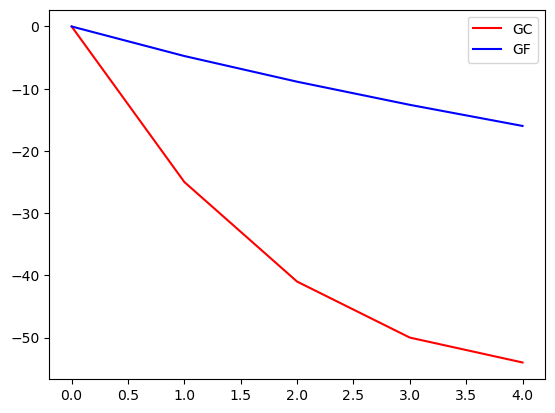

In [66]:
import matplotlib.pyplot as plt
plt.plot(x,y,'r',label = 'GC')
plt.plot(x1[:5],y1[:5],'b',label='GF')
plt.legend()
len(x1)

In [ ]:
## Implémenter ici l'algorithme du GC pour J3 et J4, et aussi l'algorithme GF (du TP1) et comparer les deux algorithmes

## Etape 3.

> - Effectuer une étude du comportement de NLGC (Fletcher-Reeves à pas constant bien choisi) vis à vis du paramètre $\epsilon$ pour la fonction quadratique suivante $(N = 10, 20, 40)$ :
$$
J_{\epsilon}(v)=\sum_{i=1}^{i=N}\left(v_{i}\right)^{2}+\frac{1}{\epsilon} \sum_{i=1}^{N-1}\left\{\left(v_{i}+v_{i+1}-N / 2\right)\right\}^{2}
$$
On fera l’étude pour $\epsilon > 0$ de plus en plus petit, par exemple $\epsilon = 10^{-p}, p = 0, 1, 2, 3$. Comparer la solution optimale calculée $u^∗$ ainsi que son coût $J_\epsilon(u^∗)$ et son gradient à ceux du vecteur $c$ défini par $c_i = N/4$ $(i = 1,\dots, N)$. Interpréter les résultats obtenus.


On rappelle que dans le cas d'une fonction quadratique
$J(v)=\frac{1}{2} \langle A v, v \rangle -\langle b, v\rangle+c$, l'algorithme NLGC (Fletcher-Reeves à pas constant) s'écrit comme suit:

**Pseudocode**

>  
- Initialisation: $u_0 \in {\mathbb R}^n$ arbitraire, $d_0 = \nabla J(u_0) \in {\mathbb R}^n$ et un pas fixe $\rho>0$
- Itérations: répéter pour $k=0,1,\dots$
  - calculer le gradient $G_k = \nabla J (u_{k})$;
  - poser $u_{k+1} = u_{k} - \rho d_k$;
  - calculer le gradient $G_{k+1}=\nabla J (u_{k+1})$;
  - calculer $\beta_k$,
  $$
  \beta_k = \frac{ \langle G_{k+1}, G_{k+1}\rangle}{\langle G_{k}, G_{k}\rangle}; \quad\text{ (Fletcher-Reeves) }
  $$
  - poser $d_{k+1} = \nabla J(u_{k+1}) + \beta_k d_k$;
- Critère d'arrêt:  $\| d_k \|_2 \leq \epsilon'$


In [71]:
n = 10
def Jeps(epsilon, v):
  ## calculer la valeur et le gradient de la fonction J(epsilon, v)
    n = len(v)
    M = 2*np.eye(n) + np.diag(np.ones(n-1),1) + np.diag(np.ones(n-1),-1)
    M[0,0], M[n-1,n-1] = 1, 1
    M = (2/epsilon)*M
    A = 2*np.eye(n) + M
    b = 2*np.ones(n)
    b[0], b[n-1] = 1, 1
    b = n/epsilon*b
    c = ((n-1)*n**2)/(4*epsilon)
    return 0.5*np.dot(np.dot(A,v),v) - np.dot(b,v) + c, np.dot(A,v) - b 
v = np.zeros(n)   
eps = 1.e-3
Jeps(1,v)

(225.0, array([-10., -20., -20., -20., -20., -20., -20., -20., -20., -10.]))

In [73]:
## Implémenter ici l'algorithme du NLGC pour Jeps
n = 10
u0 = np.zeros(n)
uk = u0
a = 1
j = 0
dk = J3(u0)[1]
er = 1.e-7
eps = 1.e-3
ro = 1.e-4
while a > er:
    x.append(j)
    y.append(Jeps(eps,uk)[0])
    Gk1 = Jeps(eps,uk)[1]
    uk = uk - ro*dk
    Gk = Jeps(eps,uk)[1]
    ck =  np.dot(Gk,Gk)/np.dot(Gk1,Gk1)
    dk = Jeps(eps,uk)[1] + ck*dk
    a = np.linalg.norm(dk)
    j+=1
print('Pour Jeps, La solution est: ', uk, 'après ', j, ' itérations et la valeur minimale est: ',Jeps(eps,uk)[0])


Pour Jeps, La solution est:  [2.4938026  2.5037036  2.4962865  2.50122712 2.49875804 2.49875804
 2.50122712 2.4962865  2.5037036  2.4938026 ] après  167  itérations et la valeur minimale est:  62.46888926849351
